In [8]:
library(readr)
library(data.table)
library(datasets)
library(dplyr)
library(lubridate)
library(ggplot2)
library(ggthemes)
library(plotly)
library(Amelia)
library(caTools)
library(class)
library(scales)

In [9]:
#dataset_sales_train = read.csv("/Users/aarati/Documents/Senior_yr/CS 636/FinalProject/sales_train.csv")
dataset_sales_train = read.csv("sales_train.csv")
head(dataset_sales_train)
#dataset_items = read.csv("/Users/aarati/Documents/Senior_yr/CS 636/FinalProject/items.csv")
dataset_items = read.csv("items.csv")
test <- read.csv("test.csv")

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
,<chr>,<int>,<int>,<int>,<dbl>,<dbl>
1,02.01.2013,0,59,22154,999.00,1
2,03.01.2013,0,25,2552,899.00,1
3,05.01.2013,0,25,2552,899.00,-1
4,06.01.2013,0,25,2554,1709.05,1
5,15.01.2013,0,25,2555,1099.00,1
6,10.01.2013,0,25,2564,349.00,1


In [10]:
dim(dataset_sales_train)
dim(dataset_items)
dataset_sales <- dataset_sales_train %>% left_join(dataset_items, by = c("item_id"))
dataset_sales$item_name <- NULL
head(dataset_sales)

[1] 2935849       6

[1] 22170     3

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
1,02.01.2013,0,59,22154,999.00,1,37
2,03.01.2013,0,25,2552,899.00,1,58
3,05.01.2013,0,25,2552,899.00,-1,58
4,06.01.2013,0,25,2554,1709.05,1,58
5,15.01.2013,0,25,2555,1099.00,1,56
6,10.01.2013,0,25,2564,349.00,1,59


In [11]:
rm(dataset_sales_train)
#rm(dataset_items)

dataset_sales <- as.data.frame(dataset_sales)

In [12]:
str(dataset_sales)
dataset_sales$date <- dmy(dataset_sales$date)

'data.frame':	2935849 obs. of  7 variables:
 $ date            : chr  "02.01.2013" "03.01.2013" "05.01.2013" "06.01.2013" ...
 $ date_block_num  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ shop_id         : int  59 25 25 25 25 25 25 25 25 25 ...
 $ item_id         : int  22154 2552 2552 2554 2555 2564 2565 2572 2572 2573 ...
 $ item_price      : num  999 899 899 1709 1099 ...
 $ item_cnt_day    : num  1 1 -1 1 1 1 1 1 1 3 ...
 $ item_category_id: int  37 58 58 58 56 59 56 55 55 55 ...


In [13]:
dataset_sales$year <- year(dataset_sales$date)
dataset_sales$month <- month(dataset_sales$date)
dataset_sales$day <- day(dataset_sales$date)
dataset_sales$weekday <- weekdays(dataset_sales$date)
dataset_sales$year <- as.factor(dataset_sales$year)
dataset_sales$weekday <- as.factor(dataset_sales$weekday)

In [14]:
dataset_sales_item_cnt_month <-
  dataset_sales %>% group_by(year, month, shop_id, item_id) %>% summarise(item_cnt_month = sum(item_cnt_day)) %>% ungroup()
dataset_sales <-
  dataset_sales %>% left_join(dataset_sales_item_cnt_month,
                              by = c("year", "month", "shop_id", "item_id"))
head(dataset_sales)
rm(dataset_sales_item_cnt_month)

`summarise()` has grouped output by 'year', 'month', 'shop_id'. You can override using the `.groups` argument.



,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,year,month,day,weekday,item_cnt_month
,<date>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<fct>,<dbl>,<int>,<fct>,<dbl>
1,2013-01-02,0,59,22154,999.00,1,37,2013,1,2,Wednesday,1
2,2013-01-03,0,25,2552,899.00,1,58,2013,1,3,Thursday,0
3,2013-01-05,0,25,2552,899.00,-1,58,2013,1,5,Saturday,0
4,2013-01-06,0,25,2554,1709.05,1,58,2013,1,6,Sunday,1
5,2013-01-15,0,25,2555,1099.00,1,56,2013,1,15,Tuesday,1
6,2013-01-10,0,25,2564,349.00,1,59,2013,1,10,Thursday,1


In [15]:
str(dataset_sales)
summary(dataset_sales)
colSums(is.na(dataset_sales))

'data.frame':	2935849 obs. of  12 variables:
 $ date            : Date, format: "2013-01-02" "2013-01-03" ...
 $ date_block_num  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ shop_id         : int  59 25 25 25 25 25 25 25 25 25 ...
 $ item_id         : int  22154 2552 2552 2554 2555 2564 2565 2572 2572 2573 ...
 $ item_price      : num  999 899 899 1709 1099 ...
 $ item_cnt_day    : num  1 1 -1 1 1 1 1 1 1 3 ...
 $ item_category_id: int  37 58 58 58 56 59 56 55 55 55 ...
 $ year            : Factor w/ 3 levels "2013","2014",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ month           : num  1 1 1 1 1 1 1 1 1 1 ...
 $ day             : int  2 3 5 6 15 10 2 4 11 3 ...
 $ weekday         : Factor w/ 7 levels "Friday","Monday",..: 7 5 3 4 6 5 7 1 1 5 ...
 $ item_cnt_month  : num  1 0 0 1 1 1 1 2 2 3 ...


      date            date_block_num     shop_id      item_id     
 Min.   :2013-01-01   Min.   : 0.00   Min.   : 0   Min.   :    0  
 1st Qu.:2013-08-01   1st Qu.: 7.00   1st Qu.:22   1st Qu.: 4476  
 Median :2014-03-04   Median :14.00   Median :31   Median : 9343  
 Mean   :2014-04-03   Mean   :14.57   Mean   :33   Mean   :10197  
 3rd Qu.:2014-12-05   3rd Qu.:23.00   3rd Qu.:47   3rd Qu.:15684  
 Max.   :2015-10-31   Max.   :33.00   Max.   :59   Max.   :22169  
                                                                  
   item_price        item_cnt_day      item_category_id   year        
 Min.   :    -1.0   Min.   : -22.000   Min.   : 0       2013:1267562  
 1st Qu.:   249.0   1st Qu.:   1.000   1st Qu.:28       2014:1055861  
 Median :   399.0   Median :   1.000   Median :40       2015: 612426  
 Mean   :   890.9   Mean   :   1.243   Mean   :40                     
 3rd Qu.:   999.0   3rd Qu.:   1.000   3rd Qu.:55                     
 Max.   :307980.0   Max.   :2169.000  

date   date_block_num          shop_id          item_id 
               0                0                0                0 
      item_price     item_cnt_day item_category_id             year 
               0                0                0                0 
           month              day          weekday   item_cnt_month 
               0                0                0                0

In [16]:
is.null(dataset_sales)

[1] FALSE

,shop_id,item_id,item_price,item_cnt_day,item_category_id,item_cnt_month
shop_id,1.000000000,0.02939639,-0.024034051,-0.005229685,0.01938046,0.002999427
item_id,0.029396392,1.00000000,-0.134104042,0.016650304,0.36943074,0.066817127
item_price,-0.024034051,-0.13410404,1.000000000,0.011196625,-0.25355416,0.002514264
item_cnt_day,-0.005229685,0.01665030,0.011196625,1.000000000,0.01476792,0.435903895
item_category_id,0.019380462,0.36943074,-0.253554162,0.014767919,1.00000000,0.063476393
item_cnt_month,0.002999427,0.06681713,0.002514264,0.435903895,0.06347639,1.000000000


Warning message in melt(cor(dataset_sales_numcols)):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(cor(dataset_sales_numcols)). In the next version, this warning will become an error.”


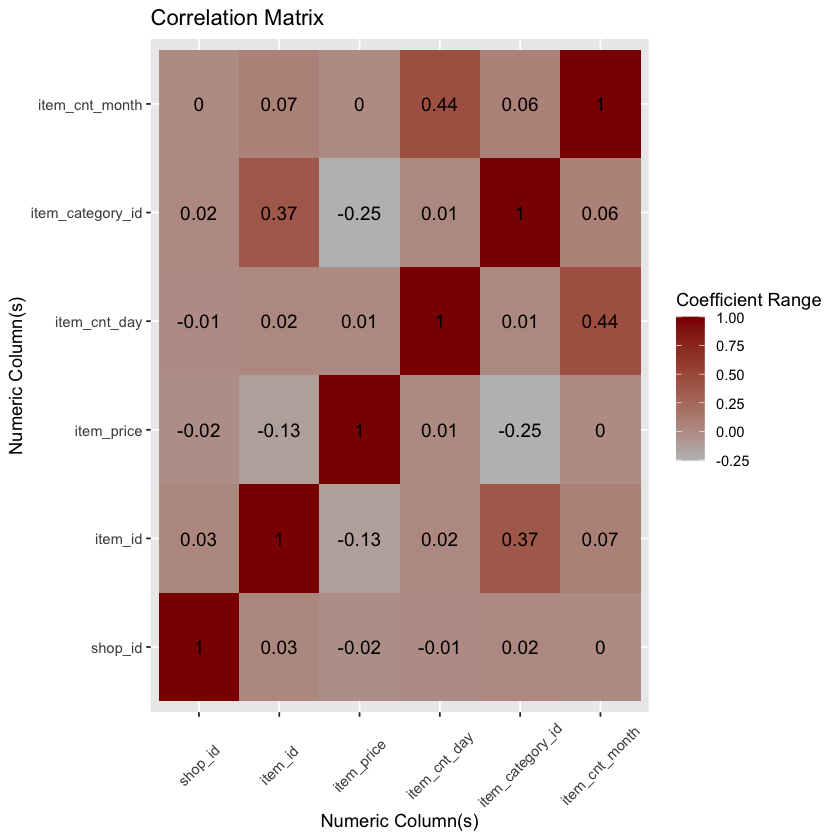

In [17]:
num.cols <- sapply(dataset_sales, is.numeric)
dataset_sales_numcols <- dataset_sales[, num.cols]
dataset_sales_numcols$date_block_num <- NULL
dataset_sales_numcols$month <- NULL
dataset_sales_numcols$day <- NULL
cor(dataset_sales_numcols)

melted_corr <- melt(cor(dataset_sales_numcols))
ggplot(data = melted_corr, aes(x = Var1, y = Var2, fill = value)) + 
  geom_tile() + 
  scale_fill_gradient(low="grey", high="darkred") + 
  geom_text(aes(x = Var1, y = Var2, label = round(value, 2)), size = 4) + 
  labs(title = "Correlation Matrix", x = "Numeric Column(s)", y = "Numeric Column(s)", fill = "Coefficient Range") + 
  theme(axis.text.x=element_text(angle=45, vjust=0.5))

rm(num.cols)
rm(dataset_sales_numcols)
rm(melted_corr)

In [18]:
head(dataset_sales)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,year,month,day,weekday,item_cnt_month
,<date>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<fct>,<dbl>,<int>,<fct>,<dbl>
1,2013-01-02,0,59,22154,999.00,1,37,2013,1,2,Wednesday,1
2,2013-01-03,0,25,2552,899.00,1,58,2013,1,3,Thursday,0
3,2013-01-05,0,25,2552,899.00,-1,58,2013,1,5,Saturday,0
4,2013-01-06,0,25,2554,1709.05,1,58,2013,1,6,Sunday,1
5,2013-01-15,0,25,2555,1099.00,1,56,2013,1,15,Tuesday,1
6,2013-01-10,0,25,2564,349.00,1,59,2013,1,10,Thursday,1


In [19]:
# Modeleling 

lm1 = lm(formula = item_cnt_day ~ shop_id + item_id,data = dataset_sales) 
lm2 = lm(formula=item_cnt_month~date_block_num+month+shop_id+item_category_id, data=dataset_sales)

# add 24 to avoid negative numbers for log transformation (subtracted later when predicting)
dataset_sales$item_cnt_month = dataset_sales$item_cnt_month + 24
lm3 = lm(formula=log(item_cnt_month)~date_block_num+month+shop_id+item_category_id, data=dataset_sales)

summary(lm1) # Residual standard error = 2.618, R^2 = 0.00031
summary(lm2) # Residual standard error = 30.25, R^2 = 0.00562
summary(lm3) # Residual standard error = 0.2006, R^2 = 0.004649

# Because the standard error in linear model 3 is less, and the correlation is stronger (R^2), we will use that model


Call:
lm(formula = item_cnt_day ~ shop_id + item_id, data = dataset_sales)

Residuals:
    Min      1Q  Median      3Q     Max 
 -23.25   -0.28   -0.23   -0.19 2167.73 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.202e+00  4.199e-03 286.306   <2e-16 ***
shop_id     -9.238e-04  9.422e-05  -9.805   <2e-16 ***
item_id      6.964e-06  2.417e-07  28.809   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.618 on 2935846 degrees of freedom
Multiple R-squared:  0.00031,	Adjusted R-squared:  0.0003093 
F-statistic: 455.2 on 2 and 2935846 DF,  p-value: < 2.2e-16



Call:
lm(formula = item_cnt_month ~ date_block_num + month + shop_id + 
    item_category_id, data = dataset_sales)

Residuals:
    Min      1Q  Median      3Q     Max 
 -33.88   -6.70   -4.41   -0.86 2247.75 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.647443   0.067276   9.624   <2e-16 ***
date_block_num   0.005378   0.001933   2.782   0.0054 ** 
month            0.338646   0.005149  65.771   <2e-16 ***
shop_id          0.001730   0.001089   1.589   0.1120    
item_category_id 0.112552   0.001033 108.952   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.25 on 2935844 degrees of freedom
Multiple R-squared:  0.005625,	Adjusted R-squared:  0.005624 
F-statistic:  4152 on 4 and 2935844 DF,  p-value: < 2.2e-16



Call:
lm(formula = log(item_cnt_month) ~ date_block_num + month + shop_id + 
    item_category_id, data = dataset_sales)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7085 -0.1400 -0.0970  0.0173  4.3637 

Coefficients:
                   Estimate Std. Error  t value Pr(>|t|)    
(Intercept)       3.328e+00  6.482e-04 5134.046  < 2e-16 ***
date_block_num   -5.110e-04  1.863e-05  -27.438  < 2e-16 ***
month             5.190e-03  4.961e-05  104.611  < 2e-16 ***
shop_id           8.092e-05  1.049e-05    7.715 1.21e-14 ***
item_category_id  3.114e-04  9.954e-06   31.282  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2915 on 2935844 degrees of freedom
Multiple R-squared:  0.00406,	Adjusted R-squared:  0.004058 
F-statistic:  2992 on 4 and 2935844 DF,  p-value: < 2.2e-16


Warning message:
“Removed 2639852 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2420341 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


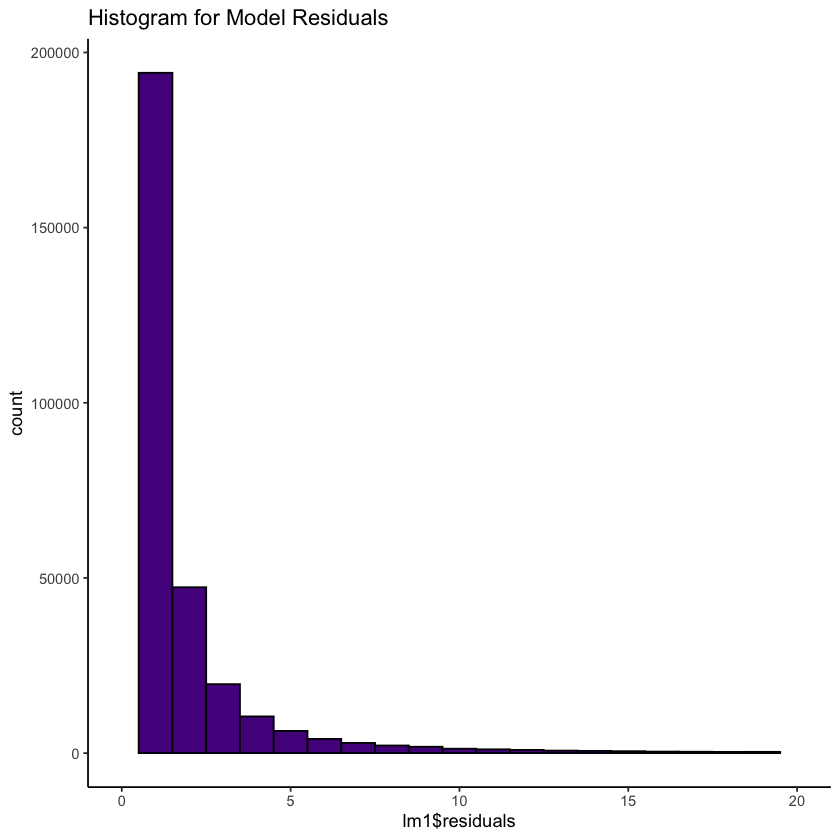

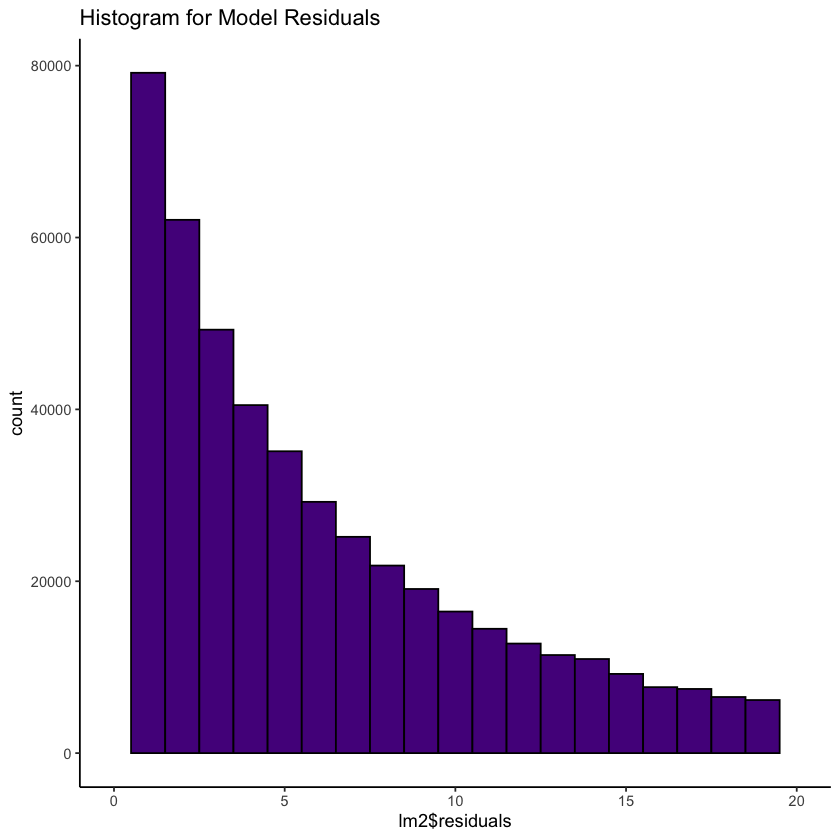

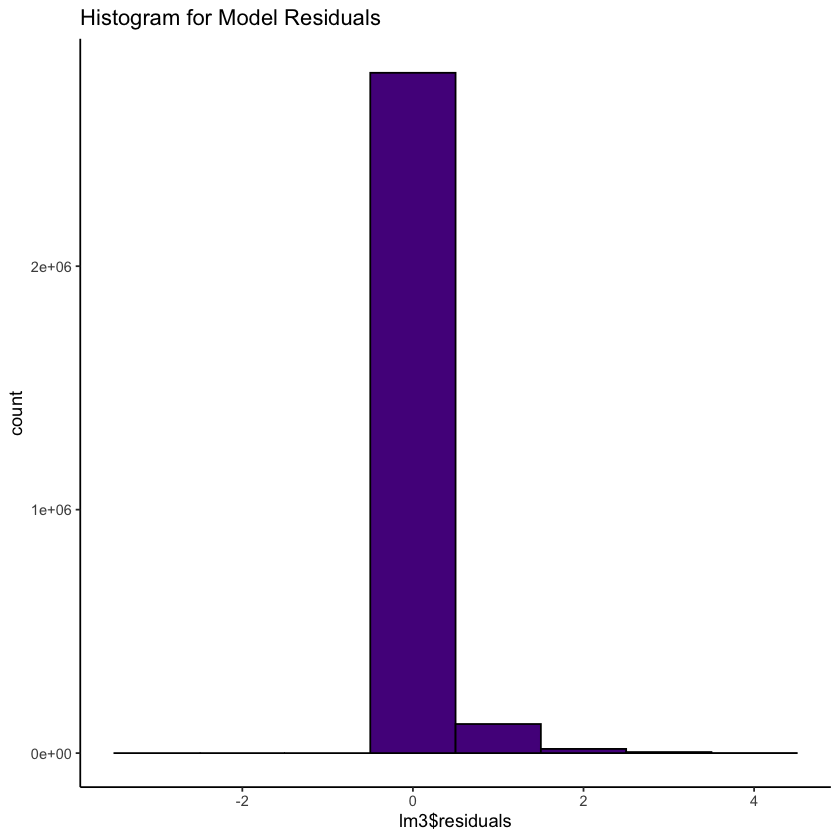

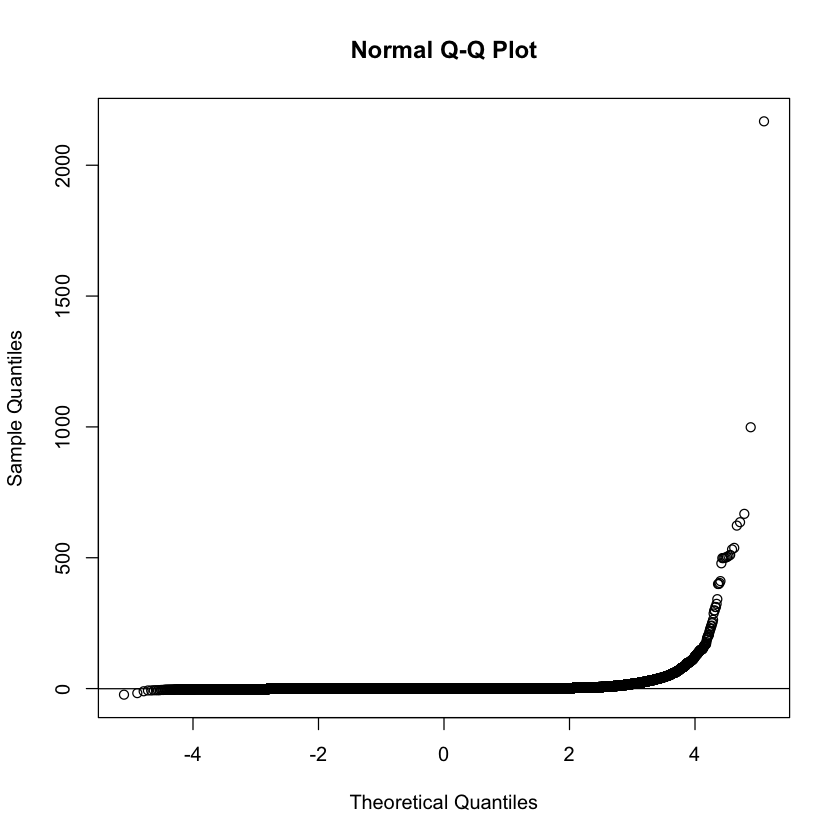

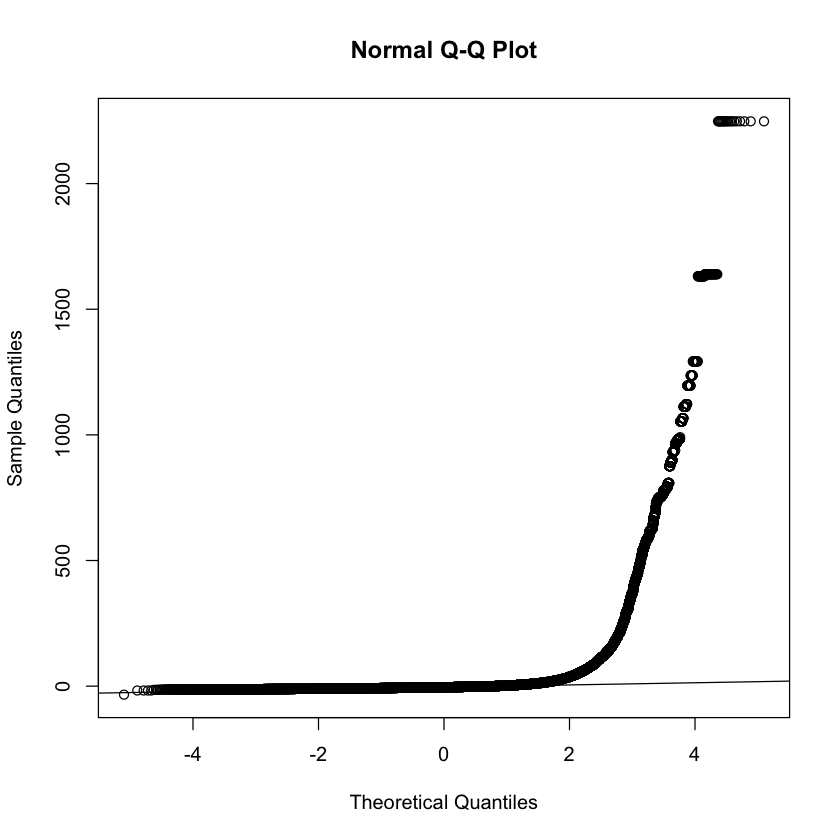

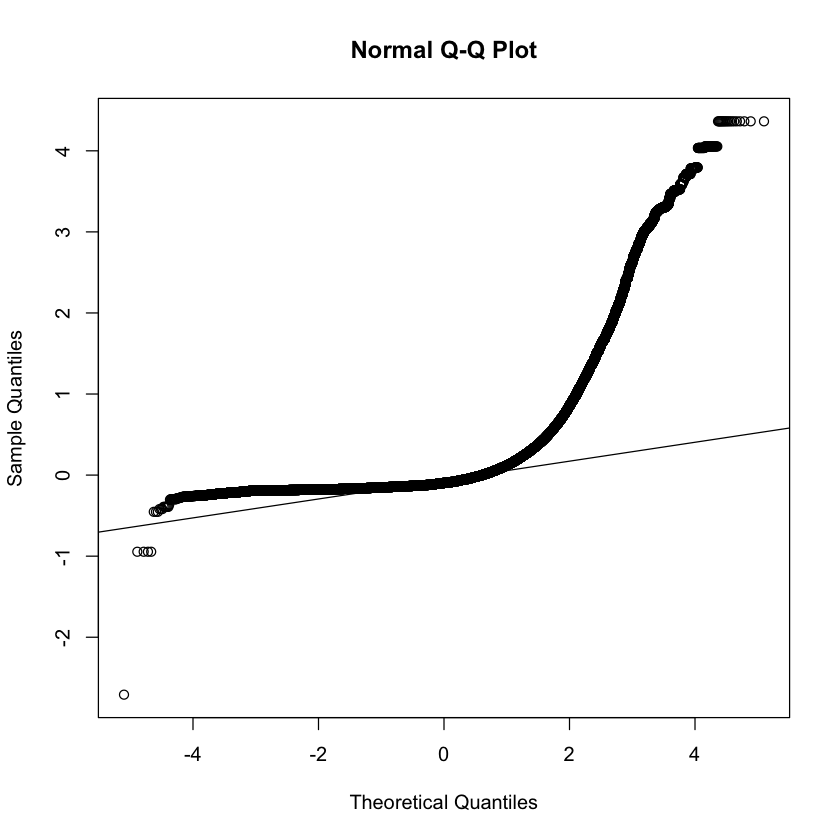

In [13]:
# Plots

# Looking at residuals (for normality of graphs)
plot1= ggplot(data=dataset_sales, aes(lm1$residuals)) +
geom_histogram(binwidth = 1, color = "black", fill = "purple4") +
theme(panel.background = element_rect(fill = "white"),
axis.line.x=element_line(),
axis.line.y=element_line()) +
ggtitle("Histogram for Model Residuals")

plot1 + scale_x_continuous(limits=c(0, 20))

plot2=ggplot(data=dataset_sales, aes(lm2$residuals)) +
geom_histogram(binwidth = 1, color = "black", fill = "purple4") +
theme(panel.background = element_rect(fill = "white"),
axis.line.x=element_line(),
axis.line.y=element_line()) +
ggtitle("Histogram for Model Residuals")

plot2 + scale_x_continuous(limits=c(0, 20))

plot3=ggplot(data=dataset_sales, aes(lm3$residuals)) +
geom_histogram(binwidth = 1, color = "black", fill = "purple4") +
theme(panel.background = element_rect(fill = "white"),
axis.line.x=element_line(),
axis.line.y=element_line()) +
ggtitle("Histogram for Model Residuals")

plot3

# Quantile Quantile Plots for normality 
qqnorm(lm1$residuals)
qqline(lm1$residuals)

qqnorm(lm2$residuals)
qqline(lm2$residuals)

qqnorm(lm3$residuals)
qqline(lm3$residuals)

In [26]:
# Predicting
test$month <- 11
test$date_block_num <- 34
test$shop_id <- as.integer(as.factor(test$shop_id))
test_data <- test %>% left_join(dataset_items, by = c("item_id"))
test_data$item_category_id = as.integer(as.factor(test_data$item_category_id))

head(test_data)
sales_predictions = predict(lm3, test_data, type="response")

# Subtract 24 (added before)
sales_predictions <- exp(sales_predictions) - 24
final_results =  data.frame(ID = test$ID,
                         item_cnt_month = sales_predictions)
final_results

,ID,shop_id,item_id,month,date_block_num,item_name,item_category_id
,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<int>
1,0,4,5037,11,34,"NHL 15 [PS3, русские субтитры]",12
2,1,4,5320,11,34,ONE DIRECTION Made In The A.M.,40
3,2,4,5233,11,34,"Need for Speed Rivals (Essentials) [PS3, русская версия]",12
4,3,4,5232,11,34,"Need for Speed Rivals (Classics) [Xbox 360, русская версия]",16
5,4,4,5268,11,34,"Need for Speed [PS4, русская версия]",13
6,5,4,5039,11,34,"NHL 15 [Xbox 360, русские субтитры]",16


,ID,item_cnt_month
,<int>,<dbl>
1,0,5.133561
2,1,5.388673
3,2,5.133561
4,3,5.169870
5,4,5.142634
6,5,5.169870
7,6,5.142634
8,7,5.388673
9,8,5.388673
